# Loading Data


In [100]:
import csv
import numpy
import scipy
from sklearn import linear_model
from math import sqrt
import matplotlib.pyplot as plt
training_list=[]
validate_list=[]
testdata_list=[]

tradata=csv.reader(open('/Users/wendy/Documents/2017 Fall/CS 534/homework1/BlogFeedback/blogData_train.csv'))
for row in tradata:
    training_list.append(row)
    
valdata=csv.reader(open('/Users/wendy/Documents/2017 Fall/CS 534/homework1/BlogFeedback/blogData_validate.csv'))
for row in valdata:
    validate_list.append(row)
    
testdata=csv.reader(open('/Users/wendy/Documents/2017 Fall/CS 534/homework1/BlogFeedback/blogData_test.csv'))
for row in testdata:
    testdata_list.append(row)
    
training_list=numpy.array(training_list,dtype=float)
validate_list=numpy.array(validate_list,dtype=float)
testdate_list=numpy.array(validate_list,dtype=float)

ytrain=training_list[:,280]
xtrain=training_list[:, 0:279]
yval=validate_list[:,280]
xval=validate_list[:,0:279]
xtest=testdate_list[:,0:279]
ytest=testdate_list[:,280]

# Normalization to x and y



In [101]:
for i in range(len(training_list[0])):
    mu=numpy.average(training_list[:,i])
    sigma=numpy.std(training_list[:,i])
    for j in range(len(training_list)):
        if sigma!=0:
            training_list[j,i] = ( training_list[j,i] - mu) / sigma 

for i in range(len(validate_list[0])):
    mu=numpy.average(validate_list[:,i])
    sigma=numpy.std(validate_list[:,i])
    for j in range(len(validate_list)):
        if sigma!=0:
            validate_list[j,i] = ( validate_list[j,i] - mu) / sigma 

for i in range(len(testdata_list[0])):
    mu=numpy.average(testdate_list[:,i])
    sigma=numpy.std(testdate_list[:,i])
    for j in range(len(testdate_list)):
        if sigma!=0:
            testdate_list[j,i] = ( testdate_list[j,i] - mu) / sigma 

In [86]:
#print validate_list[1]
#print training_list[0]


# Finding the lambda with the lowest RMSE in logspace.

Smallest RMSE is  0.758447173596
labmda = 1.09749876549e-05


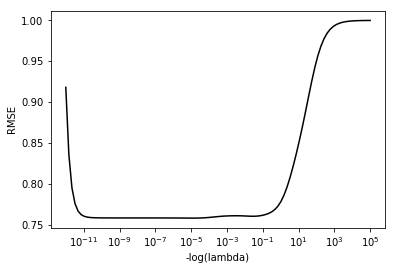

In [102]:

lamlist=list(numpy.logspace(-12,5,100))
RMSE=[]
for lam in lamlist:
    RidgeModel=linear_model.Ridge(lam,normalize=True)
    #sklearn.preprocessing.StandardScaler()
    RidgeModel.fit(xtrain,ytrain)
    RMSE.append(numpy.linalg.norm((yval-RidgeModel.predict(xval)), 2)/sqrt(len(yval)))

min_rmse=0
for i in range(len(RMSE)):
    if RMSE[i]<min_rmse or min_rmse==0:
        min_rmse=RMSE[i]
        index=i
lam=lamlist[index]
print "Smallest RMSE is ",RMSE[index]
print "labmda =", lam
RidgeModel=linear_model.Ridge(lamlist[index])
RidgeModel.fit(xtrain,ytrain)
w_model1=RidgeModel.coef_
#print w
plt.plot(lamlist,RMSE,'k')
plt.xlabel("-log(lambda)")
plt.xscale("log")
plt.ylabel('RMSE')
plt.show()



Maybe because I also did normalization on Y, the RMSE is much smaller than the original RMSE, which is around 24.

# Calculate the RMSE on test data

In [88]:
test_RMSE=numpy.linalg.norm((ytest-RidgeModel.predict(xtest)), 2)/sqrt(len(ytest))
print test_RMSE

0.758686581927


# SGD_Ridge function: return coefficient w and the objective value, trained on the entire dataset

In [3]:
import csv
import numpy
import scipy
from sklearn import linear_model
from math import sqrt
import matplotlib.pyplot as plt



from numpy import *
import random
def SGD_Ridge(lam,learning_rate):
    lam=lam
    lr=learning_rate
    #threadhold = threadhold
    max_count=300
    w=mat(ones((1,281)))
    training_list=[]
    validate_list=[]
    testdata_list=[]
    wholedata_list=[]
    tradata=csv.reader(open('/Users/wendy/Documents/2017 Fall/CS 534/homework1/BlogFeedback/blogData_train.csv'))
    for row in tradata:
        training_list.append(row)
    valdata=csv.reader(open('/Users/wendy/Documents/2017 Fall/CS 534/homework1/BlogFeedback/blogData_validate.csv'))
    for row in valdata:
        validate_list.append(row)
    testdata=csv.reader(open('/Users/wendy/Documents/2017 Fall/CS 534/homework1/BlogFeedback/blogData_test.csv'))
    for row in testdata:
        testdata_list.append(row)

    wholedata_list.extend(training_list)
    wholedata_list.extend(testdata_list)
    wholedata_list.extend(validate_list)
    for i in wholedata_list:
        i.insert(0,1)
    whole_list=numpy.array(wholedata_list,dtype=float)
    
    for i in range(len(whole_list[0])):
        mu=numpy.average(whole_list[:,i])
        sigma=numpy.std(whole_list[:,i])
        for j in range(len(whole_list)):
            if sigma!=0:
                whole_list[j,i] = ( whole_list[j,i] - mu) / sigma 
    
    y = whole_list[:,-1]
    x = whole_list[:, 0:281]
    f=[]
    index=0
    while index < max_count:
        i=random.randint(0,len(y))
        xsample=mat(x[i-1])
        ysample=mat(y[i-1])
        print xsample
        gradient_w=xsample*xsample.T*w-ysample*xsample+lam*w
        w=w-lr*gradient_w
        index = index + 1
        f.append(float(w*xsample.T))
    #print 
    return (w,f)
SGD_Ridge(100,0.1)

[[ 1.         -0.35448437 -0.45176901  0.02327263 -0.16476403 -0.27293617
  -0.33909348 -0.44472365 -0.03639881 -0.05497222 -0.19156638 -0.34715507
  -0.43992239  0.         -0.05002445 -0.15869197 -0.36269774 -0.46940545
   0.02327263 -0.23462904 -0.2643807  -0.23856237 -0.43689493 -0.02750684
  -0.09354937  0.13043862 -0.24985421  0.15527507 -0.0327445   1.26064254
  -0.31594644 -0.26027875  0.05106944  0.          1.50043429 -0.13808651
  -0.24722981  0.05457408  0.          1.50050726 -0.0211068  -0.23813539
   0.1676602  -0.0327445   1.27546089 -0.24224828 -0.40305976  0.00459663
  -1.39293786  1.54438104 -0.01443273 -0.2517107  -0.08466526 -0.24576431
  -0.24572465  0.12939436 -0.32002664 -0.21658143 -0.20469223 -0.30995672
  -0.01092125 -1.39353576 -0.74173399 -0.03853591 -0.45549054 -0.00816381
  -0.0200005  -0.72949585 -0.42776493 -0.55817716 -0.04817916 -0.05911245
  -0.18469926 -0.00816381 -0.02380734 -0.06634067 -0.00816381 -0.1240064
  -0.0365328  -0.53142995 -0.00816381 -

[[ 1.         -0.48940336 -0.74281744 -0.05083456 -0.7589178  -0.34397115
  -0.46459663 -0.71653596 -0.03639881 -0.79269342 -0.23257131 -0.48056319
  -0.70244333  0.         -0.78989112 -0.21991372 -0.50804365 -0.77738478
  -0.05083456 -0.75233362 -0.34412194 -0.29048736 -0.68386952  0.82892535
  -0.77946256  0.13043862 -0.51535055 -0.80445616 -0.0327445  -0.77543949
  -0.31594644 -0.52548546 -0.75593936  0.         -0.81838592 -0.13808651
  -0.51907773 -0.74240971  0.         -0.81420408 -0.0211068  -0.5015315
  -0.78229054 -0.0327445  -0.75538872 -0.24224828 -0.51268976 -0.71865689
   0.85174073 -0.81230395 -0.01443273 -0.34002609 -0.26107375 -0.24576431
  -0.34795203 -0.01723488 -0.32002664 -0.21658143 -0.20469223 -0.30995672
  -0.01092125  0.98103677 -0.70369754 -0.03853591 -0.45549054 -0.00816381
  -0.0200005  -0.72949585 -0.42776493 -0.55817716 -0.04817916 -0.05911245
  -0.18469926 -0.00816381 -0.02380734 -0.06634067 -0.00816381 -0.1240064
  -0.0365328  -0.53142995 -0.00816381 -0

   -3.68357907e-02]]
[[ 1.         -0.48668376 -0.73229046 -0.05083456 -0.75203571 -0.34397115
  -0.46180796 -0.7075923  -0.03639881 -0.78641494 -0.23257131 -0.47744276
  -0.69372198  0.         -0.78359439 -0.21991372 -0.50591989 -0.76820379
  -0.05083456 -0.74694086 -0.34412194 -0.29048736 -0.67638749  0.82518547
  -0.77314078  0.13043862 -0.51535055 -0.80445616 -0.0327445  -0.77543949
  -0.31594644 -0.52548546 -0.75593936  0.         -0.81838592 -0.13808651
  -0.51907773 -0.74240971  0.         -0.81420408 -0.0211068  -0.5015315
  -0.78229054 -0.0327445  -0.75538872 -0.24224828 -0.51268976 -0.71865689
   0.85174073 -0.81230395 -0.01443273 -0.34002609 -0.26107375 -0.24576431
  -0.34795203 -0.01723488 -0.32002664 -0.21658143 -0.20469223 -0.30995672
  -0.01092125  0.69027279 -0.32202148 -0.03853591 -0.45549054 -0.00816381
  -0.0200005  -0.72949585 -0.42776493 -0.55817716 -0.04817916 -0.05911245
  -0.18469926 -0.00816381 -0.02380734 -0.06634067 -0.00816381 -0.1240064
  -0.0365328  -0.53

KeyboardInterrupt: 

# Function to Calculate RMSE for each learning_rate

In [2]:
def calculate_RMSE(w):
#print w
    for i in testdata_list:
        i.insert(0,1)
    test_list=numpy.array(testdate_list,dtype=float)
    y = test_list[:,-1]
    x = test_list[:, 0:281]
    test_RMSE=0
    #print len(y)
    for i in range(len(test_list)):
        #print y[i]
        test_RMSE=test_RMSE+(y[i]-x[i]*w.T)**2/len(y)
        #print test_RMSE
        test_RMSE=sqrt(test_RMSE)
    return test_RMSE

# For a range of 300 epochs, plot the objective value on each echo, with different learning_rates, from 1e-9 to 1

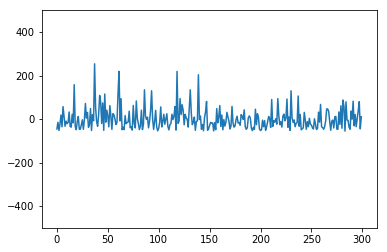

1e-09 RMSE= [[ 1.33543925]]


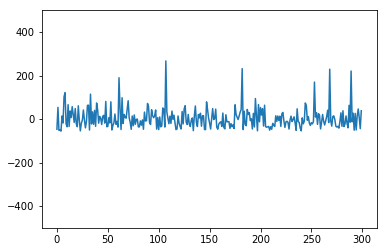

1e-08 RMSE= [[ 1.33513014]]


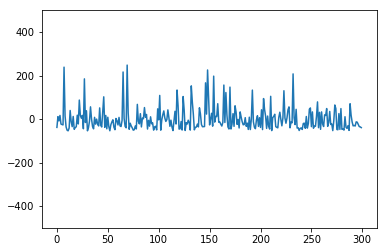

1e-07 RMSE= [[ 1.3319801]]


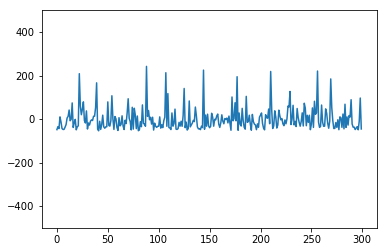

1e-06 RMSE= [[ 1.29795282]]


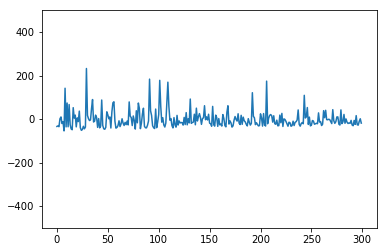

1e-05 RMSE= [[ 1.1345387]]


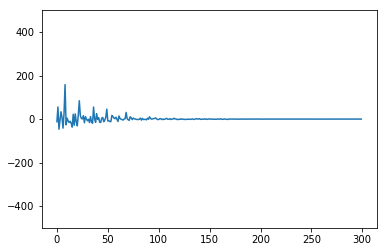

0.0001 RMSE= [[ 1.00000648]]


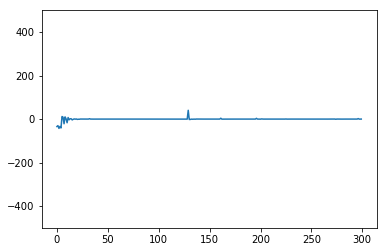

0.001 RMSE= [[ 1.00000558]]


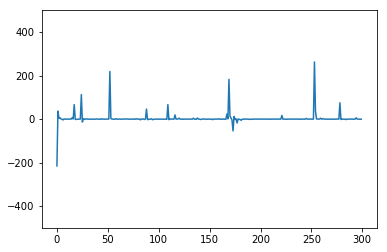

0.01 RMSE= [[ 1.00001041]]


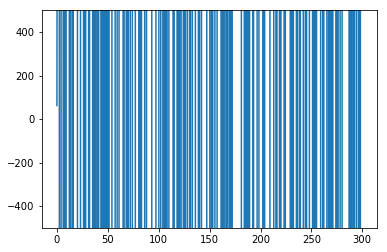

0.1 RMSE= [[ inf]]


/Users/wendy/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in subtract
/Users/wendy/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:2324: RuntimeWarning: overflow encountered in double_scalars
  x0t -= delta


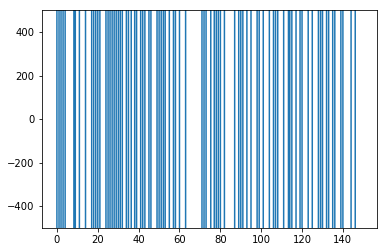

1.0 RMSE= [[ nan]]


In [91]:
learning_rate_list=list(numpy.logspace(-9,0,10))
for i in learning_rate_list:
    w,f=SGD_Ridge(lam,i)
    plt.plot(f)
    plt.ylim(-500,500)
    plt.show()
    RMSE=calculate_RMSE(w)
    print i,"RMSE=", RMSE


It shows that when the learning_rate is 0.001，the SGD can convergent best. 
It also has a closest RMSE value on test set with the first model, 
which is 1.00000558 compared to 0.758686581927.

# campare the coefficients of two models

In [103]:
w_model1=RidgeModel.coef_
print "coefficient in the first model is:",'\n',w_model1

coefficient in the first model is: 
[ -1.46374939e+00   6.50080133e-01   2.12663076e-03  -2.79392491e-02
   9.64292745e-02   3.68746547e-01  -8.96964898e-01  -8.26669488e-03
   2.49348210e-01  -1.12369347e-01   7.91080518e-01   4.86885296e-01
   0.00000000e+00  -5.35886063e-01   1.01169825e-01   2.65890542e-01
  -3.85336261e-01   2.12660765e-03   1.45582110e-01   7.33557541e-02
   2.27072048e-01   3.17966969e-01  -1.07400787e-01   4.63787365e-02
   1.54206682e-02  -1.40313616e-01   4.87745097e-03   1.62399218e-03
  -7.88234579e-02   1.73053154e-02  -2.14786498e-01   1.66832787e-01
   0.00000000e+00  -3.49736731e-03   5.25066507e-03   3.23589743e-01
  -2.59856799e-01   0.00000000e+00   2.64669414e-01  -3.71153152e-03
   2.35295042e-02   5.41029090e-02   1.62398952e-03   1.43727291e-02
  -9.92652215e-03   6.32831697e-03   2.42347009e-02   9.64363087e-02
  -1.04171066e-01   8.42552481e-04  -1.23948911e-01   2.15701739e-01
   5.22880147e-02  -7.85305196e-02   1.38164701e-01  -3.70925188e-0

In [104]:
w,f=SGD_Ridge(lam,0.001)
print "coefficient in the second model is:",'\n',w


coefficient in the second model is: 
[[  8.84131718e-03   3.78137628e-02   3.25223481e-02  -4.76545660e-04
    3.38984964e-02   3.87808254e-02   3.82704400e-02   3.30431391e-02
   -3.21813463e-04   2.94902991e-02   3.69634011e-02   3.78659964e-02
    3.35965872e-02   5.71934214e-36   2.96215495e-02   3.33827154e-02
    3.69422654e-02   3.00853456e-02  -4.76545660e-04   3.13902632e-02
    3.85677114e-02   3.66374739e-02   3.36628764e-02  -2.14429416e-02
    2.95803405e-02  -9.46407618e-03   2.62516767e-02   2.33855898e-02
   -2.89504485e-04   2.52761996e-02   2.63871671e-02   2.68653223e-02
    2.32746947e-02   5.71934214e-36   2.19223710e-02   3.22594995e-02
    2.69379048e-02   2.33589610e-02   5.71934214e-36   2.19076772e-02
   -1.86611927e-04   2.62460427e-02   2.33603194e-02  -2.89504485e-04
    2.50971718e-02   2.26649326e-02   2.01682915e-02   2.33663720e-02
   -2.06609094e-02   2.15811364e-02  -1.27604383e-04   3.02301317e-02
    4.40679346e-02   1.83112219e-02   2.85059588e-02 

The coefficients of two models are different.
The coefficient of SGD is smaller.
The coefficient obtained from first model is a closed form solution, and is also the optimal solution. The solution of SGD is not optimal but it also converged. One possible reason is that it found a suboptimal solution, and the search space is not a convex space. Another interpretation is that it converged because it is circle around the optimal solution back and forward.